In [2]:
%matplotlib inline

#import numpy as np
#import rasterio
#from osgeo import gdal
#import matplotlib.pyplot as plt
#import matplotlib.ticker as tkr
#import seaborn as sns
#from __future__ import division
import pandas as pd
#import seaborn
#from rasterstats import zonal_stats

In [55]:
dataset = 'forest'
year_1 = '2017'
year_2 = '2018'
thresholds = [-1, -2, -3, -4]

# List of buffer distances (must have corresponding shapefiles)
dists = [1, 2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]

# Add 'km' for field naming and display
dists_l = [str(dist) + 'km' for dist in dists]

In [76]:
for thresh in thresholds:
    stats_1 = pd.read_csv('../../_elk_plots//GIS/elkplots_v3/stats_{dataset}_{thresh}_{year}.csv'.format(dataset=dataset, thresh=thresh, year=year_1))
    stats_2 = pd.read_csv('../../_elk_plots/GIS/elkplots_v3/stats_{dataset}_{thresh}_{year}.csv'.format(dataset=dataset, thresh=thresh, year=year_2))

    diff_years = pd.DataFrame()
    diff = pd.DataFrame()
    for dist_l in dists_l:
        diff_years[['ID','CITY']] = stats_1[['ID','CITY']]
        diff_years['thresh'] = thresh
        diff_years['percfor_{dist}_{year}'.format(dist=dist_l, year=year_1)] = stats_1['percfor_{dist}'.format(dist=dist_l)]
        diff_years['percfor_{dist}_{year}'.format(dist=dist_l, year=year_2)] = stats_2['percfor_{dist}'.format(dist=dist_l)]

        diff[['ID','CITY']] = stats_1[['ID','CITY']]
        diff['thresh'] = thresh
        year_2_val = diff_years['percfor_{dist}_{year}'.format(dist=dist_l, year=year_2)]
        year_1_val = diff_years['percfor_{dist}_{year}'.format(dist=dist_l, year=year_1)]
        diff['percfor_{dist}_change'.format(dist=dist_l)] =  year_2_val - year_1_val 

        diff_years.to_csv('../../_elk_plots/GIS/elkplots_v3/stats_{dataset}_{thresh}_2017-2018.csv'.format(dataset=dataset, thresh=thresh, year=year_2))
        diff.to_csv('../../_elk_plots/GIS/elkplots_v3/stats_{dataset}_{thresh}_change.csv'.format(dataset=dataset, thresh=thresh))


In [77]:
stats_1 = pd.read_csv('../../_elk_plots//GIS/elkplots_v3/stats_{dataset}_-1_change.csv'.format(dataset=dataset))
stats_2 = pd.read_csv('../../_elk_plots/GIS/elkplots_v3/stats_{dataset}_-2_change.csv'.format(dataset=dataset))
stats_3 = pd.read_csv('../../_elk_plots/GIS/elkplots_v3/stats_{dataset}_-3_change.csv'.format(dataset=dataset))
stats_4 = pd.read_csv('../../_elk_plots/GIS/elkplots_v3/stats_{dataset}_-4_change.csv'.format(dataset=dataset))

In [78]:
fields

['percfor_1km_change',
 'percfor_2km_change',
 'percfor_5km_change',
 'percfor_10km_change',
 'percfor_15km_change',
 'percfor_20km_change',
 'percfor_25km_change',
 'percfor_30km_change',
 'percfor_35km_change',
 'percfor_40km_change',
 'percfor_45km_change',
 'percfor_50km_change',
 'percfor_55km_change',
 'percfor_60km_change',
 'percfor_65km_change',
 'percfor_70km_change',
 'percfor_75km_change']

In [79]:
if dataset == 'forest':
    fields = ['percfor_' + dist_l + '_change' for dist_l in dists_l]
else:
    fields = ['perc_' + dist_l + '_change' for dist_l in dists_l]

stats_1_arr = np.asarray(stats_1[fields])
stats_2_arr = np.asarray(stats_2[fields])
stats_3_arr = np.asarray(stats_3[fields])
stats_4_arr = np.asarray(stats_4[fields])

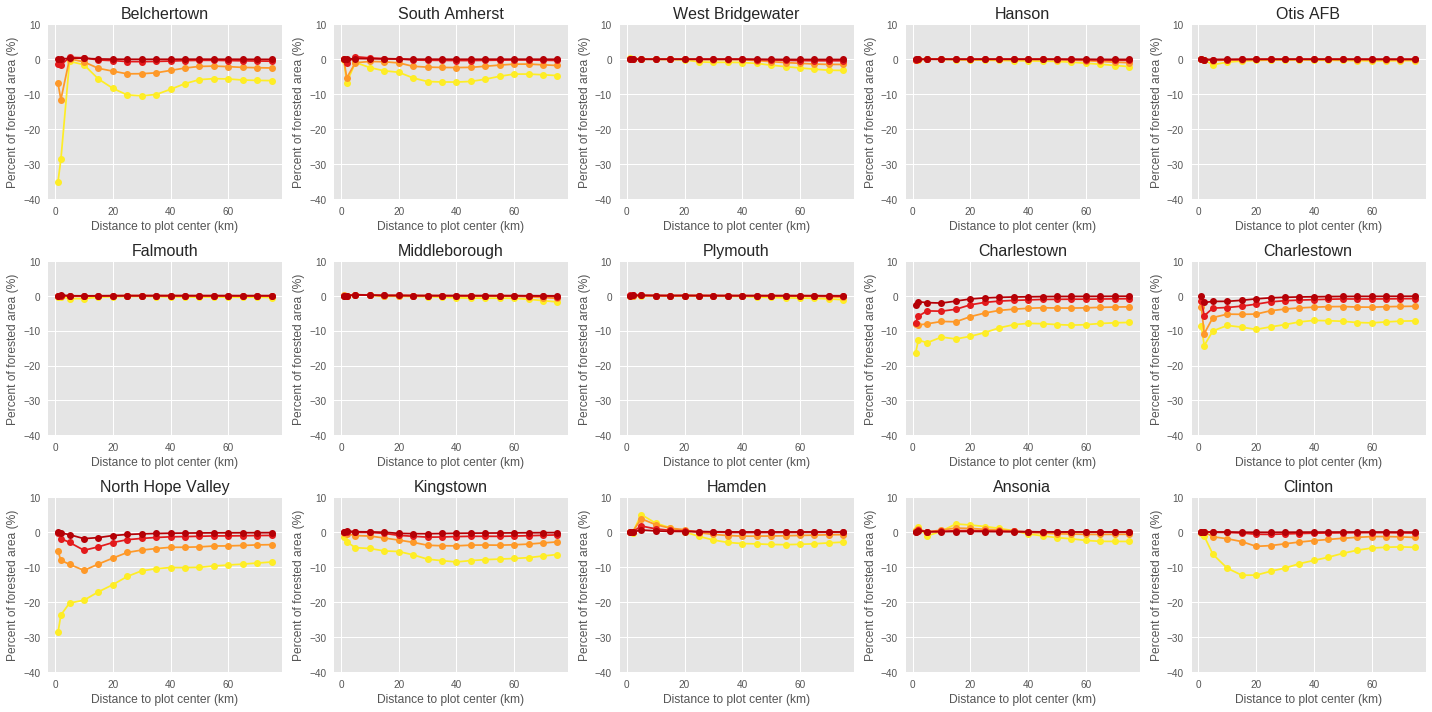

In [80]:
# Plot for all sites
sites = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

fig = plt.figure(figsize=(20,10))
plt.style.use('ggplot') 
for site in sites:
    town = stats_1['CITY'][site]
    ax = fig.add_subplot(3,5,(site+1))
    plt.plot(dists, stats_1_arr[site], marker='o', color="#feed26")
    plt.plot(dists, stats_2_arr[site], marker='o', color="#fe9929")
    plt.plot(dists, stats_3_arr[site], marker='o', color="#e31a1c")
    plt.plot(dists, stats_4_arr[site], marker='o', color="#b50006")
    plt.title('{town}'.format(town=town), fontsize=16)
    if dataset == 'forest':
        plt.ylabel('Percent of forested area (%)')
    else: 
        plt.ylabel('Percent of total area (%)')
    plt.ylim((-40,10))
    plt.xlabel('Distance to plot center (km)')
    
plt.tight_layout()
plt.savefig('../../_elk_plots/GIS/elkplots_v3/plot_semivar_all_change.png', dpi=400) 
plt.show()